<a href="https://colab.research.google.com/github/seunghyunmoon2/NLP/blob/master/NLP12_NAVERMOVIE_comments_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 정의

1. 네이버 영화 리뷰 코멘트들을 수집한다.
2. 코멘트를 binary값을 가진 태그로 분류 한다.(CNN 사용)(1: 긍정, 0: 부정)
    - ex) "액션이 없는데도 재미 있는 몇안되는 영화" => 1 : 긍정
    - ex) "원작의 긴장감을 제대로 살려내지못했다."  => 0 : 부정
3. 정확도를 확인한다.


# 전처리

## mount Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## konlpy 설치

In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:12 http://archive.ubuntu.com/ubuntu bionic-ba

## 전처리

In [ ]:
# 네이버 영화 리뷰 데이터 전처리
# 데이터 : https://github.com/e9t/nsmc
# https://github.com/e9t/nsmc/blob/master/ratings.txt
# ------------------------------------
import re
import pandas as pd
import numpy as np
from konlpy.tag import Okt
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

# 4.2 장에서 사용할 데이터인 네이버 영화 리뷰 데이터를 불러온다
DATA_IN_PATH = '/content/drive/My Drive/NLP/dataset/'
movie_data = pd.read_csv(DATA_IN_PATH + '4-8.ratings.txt', 
                         header = 0, delimiter = '\t', quoting = 3)
movie_data = movie_data.dropna()
print('전체 데이터의 개수: {}'.format(len(movie_data)))

# 전처리 작업
def preprocessing(review, okt, remove_stopwords = False, stop_words = []):
    review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\s]", "", review)
    word_review = okt.morphs(review_text, stem=True)
   
    if remove_stopwords:
        word_review = [token for token in word_review if not token in stop_words]
        
    return word_review

stop_words = ['은', '는', '이', '가', '하', '아', '것', '들',
              '의', '있', '되', '수', '보', '주', '등', '한']
okt = Okt()
clean_review = []

for i, review in enumerate(movie_data['document']):
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        p = preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words)
        clean_review.append(p)
    else:
        clean_review.append([])  # string이 아니면 비어있는 값 추가
        print(i, review)
        
    if i % 100 == 0:
        print('%d : %.2f%% 완료됨.' % (i, 100 * i / len(movie_data)))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_review)
movie_tokens = tokenizer.texts_to_sequences(clean_review)
word_vocab = tokenizer.word_index # 단어 사전 형태

MAX_SEQUENCE_LENGTH = 8 # 문장 최대 길이
movie_review = pad_sequences(movie_tokens, maxlen=MAX_SEQUENCE_LENGTH, 
                             padding='post', truncating='post')
movie_label = np.array(movie_data['label']) # 학습 데이터의 라벨


# 전처리 된 학습 데이터를 넘파이 형태로 저장
MOVIE_REVIEW_DATA = '4-8.ratings_review.npy'
MOVIE_LABEL_DATA = '4-8.ratings_label.npy'

np.save(open(DATA_IN_PATH + MOVIE_REVIEW_DATA, 'wb'), movie_review)
np.save(open(DATA_IN_PATH + MOVIE_LABEL_DATA, 'wb'), movie_label)

전체 데이터의 개수: 199992
0 : 0.00% 완료됨.
100 : 0.05% 완료됨.
200 : 0.10% 완료됨.
300 : 0.15% 완료됨.
400 : 0.20% 완료됨.
500 : 0.25% 완료됨.
600 : 0.30% 완료됨.
700 : 0.35% 완료됨.
800 : 0.40% 완료됨.
900 : 0.45% 완료됨.
1000 : 0.50% 완료됨.
1100 : 0.55% 완료됨.
1200 : 0.60% 완료됨.
1300 : 0.65% 완료됨.
1400 : 0.70% 완료됨.
1500 : 0.75% 완료됨.
1600 : 0.80% 완료됨.
1700 : 0.85% 완료됨.
1800 : 0.90% 완료됨.
1900 : 0.95% 완료됨.
2000 : 1.00% 완료됨.
2100 : 1.05% 완료됨.
2200 : 1.10% 완료됨.
2300 : 1.15% 완료됨.
2400 : 1.20% 완료됨.
2500 : 1.25% 완료됨.
2600 : 1.30% 완료됨.
2700 : 1.35% 완료됨.
2800 : 1.40% 완료됨.
2900 : 1.45% 완료됨.
3000 : 1.50% 완료됨.
3100 : 1.55% 완료됨.
3200 : 1.60% 완료됨.
3300 : 1.65% 완료됨.
3400 : 1.70% 완료됨.
3500 : 1.75% 완료됨.
3600 : 1.80% 완료됨.
3700 : 1.85% 완료됨.
3800 : 1.90% 완료됨.
3900 : 1.95% 완료됨.
4000 : 2.00% 완료됨.
4100 : 2.05% 완료됨.
4200 : 2.10% 완료됨.
4300 : 2.15% 완료됨.
4400 : 2.20% 완료됨.
4500 : 2.25% 완료됨.
4600 : 2.30% 완료됨.
4700 : 2.35% 완료됨.
4800 : 2.40% 완료됨.
4900 : 2.45% 완료됨.
5000 : 2.50% 완료됨.
5100 : 2.55% 완료됨.
5200 : 2.60% 완료됨.
5300 : 2.65% 완료됨.
5400 : 2.70% 완료됨.
550

# CNN을 이용한 Classification

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 8, 32)             1588800   
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 32)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8, 32)             3104      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               8250      
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)              

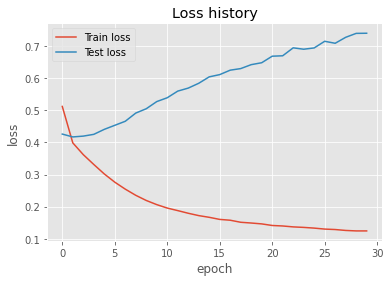


Accuracy = 78.16 %


In [ ]:
# Word embedding과 CNN을 이용한 네이버 영화리뷰 데이터 분류
# 데이터 : https://github.com/e9t/nsmc
# --------------------------------------------------------
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout
from tensorflow.keras.layers import Conv1D, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

MOVIE_REVIEW_DATA = '4-8.ratings_review.npy'
MOVIE_LABEL_DATA = '4-8.ratings_label.npy'
DATA_IN_PATH = '/content/drive/My Drive/NLP/dataset/'

# 전처리가 완료된 학습 데이터를 읽어온다.
input_data = np.load(open(DATA_IN_PATH + MOVIE_REVIEW_DATA, 'rb'))
label_data = np.load(open(DATA_IN_PATH + MOVIE_LABEL_DATA, 'rb'))

# 학습 데이터와 시험 데이터로 분리한다.
TEST_SPLIT = 0.1
RANDOM_SEED = 13371447

train_input, test_input, train_label, test_label = train_test_split(input_data, label_data, 
                                                                    test_size=TEST_SPLIT, random_state=RANDOM_SEED)

# CNN 모델을 빌드한다.
VOCAB_SIZE = input_data.max() + 1
EMB_SIZE = 32

inputX = Input(batch_shape=(None, train_input.shape[1]))
emb = Embedding(input_dim=VOCAB_SIZE, output_dim=EMB_SIZE)(inputX)
emb = Dropout(rate=0.2)(emb)
conv = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(emb)
pool = GlobalMaxPool1D()(conv)
hidden = Dense(250, activation='relu')(pool)
hidden = Dropout(rate=0.2)(hidden)
outputY = Dense(1, activation='sigmoid')(hidden)

model = Model(inputX, outputY)
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0005))
model.summary()

# 학습
train_label = train_label.reshape(-1, 1)
test_label = test_label.reshape(-1, 1)
hist = model.fit(train_input, train_label,
                 validation_data = (test_input, test_label),
                 batch_size = 500, epochs = 30)

# Loss history를 그린다
plt.plot(hist.history['loss'], label='Train loss')
plt.plot(hist.history['val_loss'], label = 'Test loss')
plt.legend()
plt.title("Loss history")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# 시험 데이터로 학습 성능을 평가한다
predicted = model.predict(test_input)
test_pred = np.where(predicted > 0.5, 1, 0)
accuracy = (test_label == test_pred).mean()
print("\nAccuracy = %.2f %s" % (accuracy * 100, '%'))

# 결과

정확도 : 78.16%
나쁘지 않은 것 같다.